# This notebook examines the general trends in FAC data
A more thorough writeup can be found in https://drive.google.com/open?id=1U6stzP7qhqB3B10kNYnWdlgtAibwoFEI6cuKOSSq-ZU

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

processed_path = '/data/ihwang/data_journalism/allfac/processed/'
general_df = pd.read_pickle(processed_path + 'general.pkl')
# print('General DF\n', general_df.head())

# Agency prefix dictionary:
with open(processed_path + 'agency_dict', 'rb') as f_w:
    agency_dict = pickle.load(f_w)
# Entity code dictionary:
with open(processed_path + 'entity_dict', 'rb') as f_w:
    entity_dict = pickle.load(f_w)

## Type of Opinions

Index(['905', '904', '403', '100', '200', '909', '888', '903', '908', '505'], dtype='object')
Index(['66', '97', '12', '16', '  ', '20', '10', '93', '84', '14'], dtype='object')
Index(['NJ', 'MA', 'FL', 'MI', 'IL', 'OH', 'PA', 'TX', 'NY', 'CA'], dtype='object')


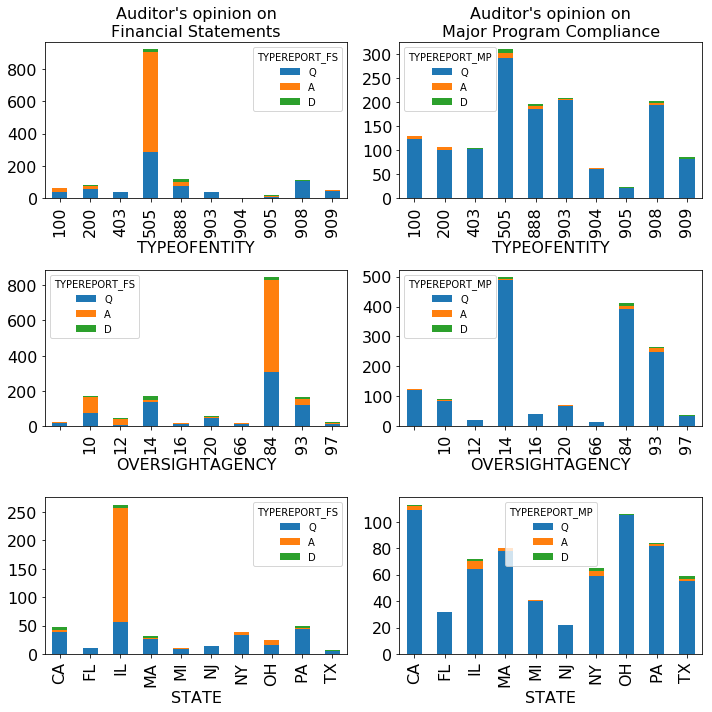

In [2]:
# opinion_dict = {'U': 'Unqualified', 'Q': 'Qualified', 'A': 'Adverse', 'D': 'Disclaimer'}
year = 2015
# sortby = 'TYPEOFENTITY'
# sortby = 'OVERSIGHTAGENCY'
# sortby = 'STATE'
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
for (index, sortby) in enumerate(['TYPEOFENTITY', 'OVERSIGHTAGENCY', 'STATE']):
    year_df = general_df[general_df['AUDITYEAR'] == year]
    sortby_sorted = year_df[sortby].value_counts(ascending=True)  # Sort df for year by counts entity count
    top_10_sortby = sortby_sorted.index[-10:]  # Take 10 most represented entities
    
    top_10_sortby_df = year_df[year_df[sortby].isin(top_10_sortby)]  # Create dataframe for top 10 entities

    typereport_fs_plot = top_10_sortby_df.\
    groupby(sortby)['TYPEREPORT_FS'].value_counts().unstack(level=1)[
        ['Q', 'A', 'D']  # Select these opinions to plot
    ].\
    plot(
        kind='bar', fontsize=16, stacked=True, ax=axes[index, 0]
    )
    if index == 0:
        typereport_fs_plot.set_title('Auditor\'s opinion on\nFinancial Statements', fontsize=16)
    typereport_fs_plot.set_xlabel(sortby, fontsize=16)

    typereport_fs_plot = top_10_sortby_df.\
    groupby(sortby)['TYPEREPORT_MP'].value_counts().unstack(level=1)[
        ['Q', 'A', 'D']
    ].\
    plot(
        kind='bar', fontsize=16, stacked=True, ax=axes[index, 1]
    )
    if index == 0:
        typereport_fs_plot.set_title('Auditor\'s opinion on\nMajor Program Compliance', fontsize=16)
    typereport_fs_plot.set_xlabel(sortby, fontsize=16)
    print(top_10_sortby)
plt.tight_layout()
plt.show()
states = list(top_10_sortby)

## Plot percent of all audits by entity type

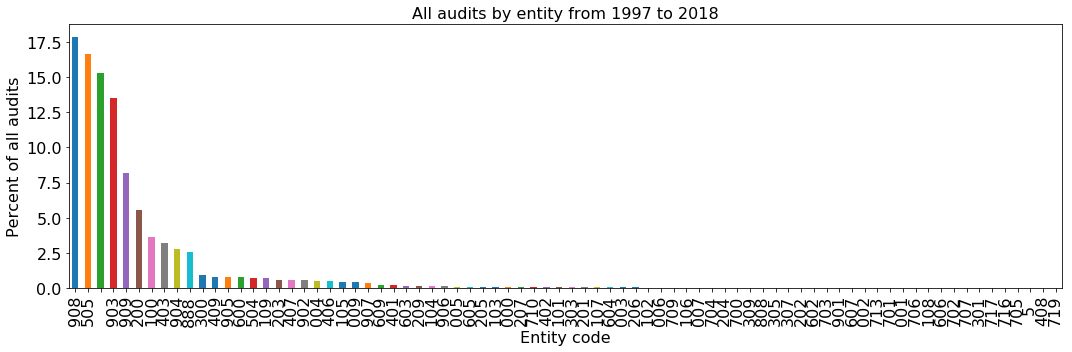

Total number of audits: 838217


In [3]:
fig, axes = plt.subplots(figsize=(15, 5))
entity_groups = general_df.groupby('TYPEOFENTITY').size().sort_values(ascending=False) / len(general_df) * 100
percent_audits_plot = entity_groups.plot(kind='bar', fontsize=16)
percent_audits_plot.set_xlabel('Entity code', fontsize=16)
percent_audits_plot.set_ylabel('Percent of all audits', fontsize=16)
percent_audits_plot.set_title(
    'All audits by entity from %s to %s' %(min(general_df['AUDITYEAR']), max(general_df['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(general_df))

In [4]:
entity_dict['908']

'Non-profit Social Services Organization'

## Plot percent of all A or D audits by entity type

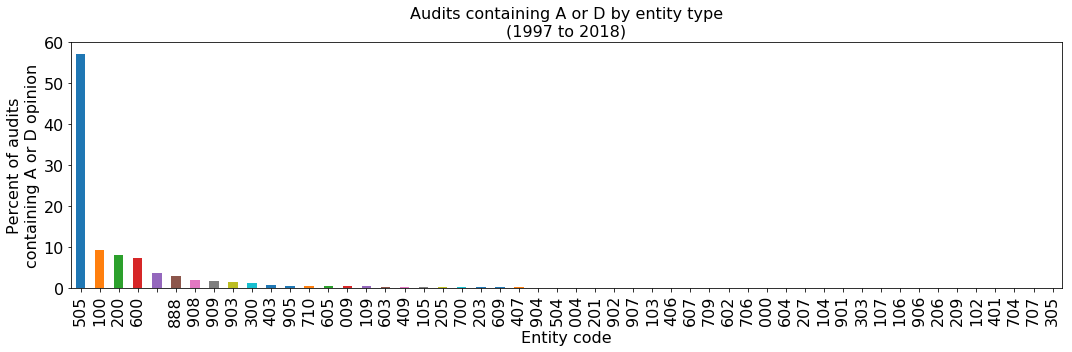

Total number of audits: 13096


In [5]:
ad_df = general_df[(general_df['TYPEREPORT_FS'].str.contains('A')) | (general_df['TYPEREPORT_FS'].str.contains('D'))]
entity_groups = ad_df.groupby('TYPEOFENTITY').size().sort_values(ascending=False) / len(ad_df) * 100


fig, axes = plt.subplots(figsize=(15, 5))
percent_audits_plot = entity_groups.plot(kind='bar', fontsize=16)
percent_audits_plot.set_xlabel('Entity code', fontsize=16)
percent_audits_plot.set_ylabel('Percent of audits\ncontaining A or D opinion', fontsize=16)
percent_audits_plot.set_title(
    'Audits containing A or D by entity type\n(%s to %s)' %(min(ad_df['AUDITYEAR']), max(ad_df['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(ad_df))

## Plot ILEA audits by audit finding

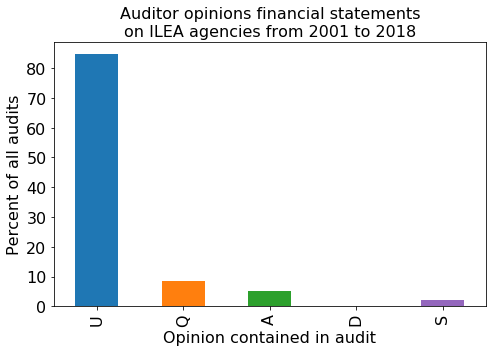

Total number of audits: 139300


In [6]:
# Note: because we are looking for audits containing opinion, the sum of op_series is greater than 1
ilea_df = general_df[general_df['TYPEOFENTITY'] == '505']
op_list = ['U', 'Q', 'A', 'D', 'S']
op_groups = ilea_df.groupby('TYPEREPORT_FS').size()
op_dict = dict(zip(op_list, np.zeros(len(op_list))))
for op in op_groups.index:
    for i in op:
        op_dict[i] += op_groups[op]
op_series = pd.Series(op_dict)
op_series = op_series / len(ilea_df) * 100
        

fig, axes = plt.subplots(figsize=(7, 5))
percent_505_audits_plot = op_series.plot(kind='bar', fontsize=16)
percent_505_audits_plot.set_xlabel('Opinion contained in audit', fontsize=16)
percent_505_audits_plot.set_ylabel('Percent of all audits', fontsize=16)
percent_505_audits_plot.set_title(
    'Auditor opinions financial statements\non ILEA agencies from %s to %s' %(min(ilea_df['AUDITYEAR']), max(ilea_df['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of audits:', len(ilea_df))

## Plot percentage of all ILEAs that have at least one A/D audit

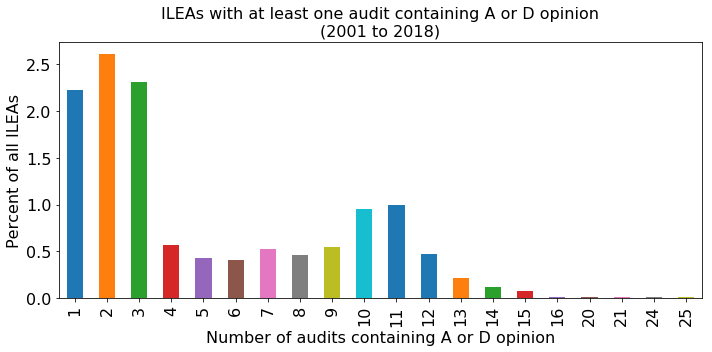

Total number of ILEAs (over all time, over all types of audits): 11277


In [7]:
ad_eins = set(ad_df[ad_df['TYPEOFENTITY'] == '505']['EIN'])

        
ilea_audit_dict = {}
for name, group in ilea_df[ilea_df['EIN'].isin(ad_eins)].groupby(['EIN', 'TYPEREPORT_FS']):
    ein = name[0]
    audit_opinion = name[1]
    if 'A' in audit_opinion or 'D' in audit_opinion:
        number_ad_audit = len(group)
        if ein not in ilea_audit_dict.keys():
            ilea_audit_dict[ein] = 0
        ilea_audit_dict[ein] += number_ad_audit


# Remap dictionary of ILEAs with A/D audits into dictionary of
# years of bad audits and number of ILEAs
ad_audit_dict = {}
for ein, number_ad_audits in ilea_audit_dict.items():
    if number_ad_audits not in ad_audit_dict.keys():
        ad_audit_dict[number_ad_audits] = 0
    ad_audit_dict[number_ad_audits] += 1   
ad_audit_series = pd.Series(ad_audit_dict).sort_index() / ilea_df['EIN'].nunique() * 100


fig, axes = plt.subplots(figsize=(10, 5))
ad_audit_plot = ad_audit_series.plot(kind='bar', fontsize=16)
ad_audit_plot.set_xlabel('Number of audits containing A or D opinion', fontsize=16)
ad_audit_plot.set_ylabel('Percent of all ILEAs', fontsize=16)
ad_audit_plot.set_title(
    'ILEAs with at least one audit containing A or D opinion\n(%d to %d)' \
    %(min(ilea_df[ilea_df['EIN'].isin(ad_eins)]['AUDITYEAR']), max(ilea_df[ilea_df['EIN'].isin(ad_eins)]['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of ILEAs (over all time, over all types of audits):', ilea_df['EIN'].nunique())

## Plot percentage of A/D ILEA audits by state

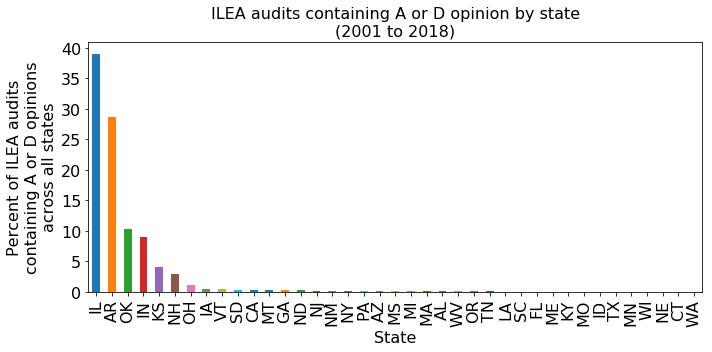

Total number of A/D ILEA audits: 7485


In [8]:
fig, axes = plt.subplots(figsize=(10, 5))
state_ad_ilea_df = ad_df[ad_df['EIN'].isin(ad_eins)]
state_ad_ilea_df = state_ad_ilea_df[state_ad_ilea_df['TYPEOFENTITY'] == '505']
state_ad_ilea_series = state_ad_ilea_df[state_ad_ilea_df['TYPEOFENTITY'] == '505'].groupby(['STATE']).\
    size().sort_values(ascending=False) / len(ad_df[ad_df['EIN'].isin(ad_eins)]) * 100
state_ad_ilea_plot = state_ad_ilea_series.plot(kind='bar', fontsize=16)
state_ad_ilea_plot.set_xlabel('State', fontsize=16)
state_ad_ilea_plot.set_ylabel('Percent of ILEA audits\ncontaining A or D opinions\nacross all states', fontsize=16)
state_ad_ilea_plot.set_title(
    'ILEA audits containing A or D opinion by state\n(%d to %d)' \
    %(min(state_ad_ilea_df['AUDITYEAR']), max(state_ad_ilea_df['AUDITYEAR'])),
    fontsize=16
)
plt.tight_layout()
plt.show()
print('Total number of A/D ILEA audits:', len(state_ad_ilea_df))

## Plot ILEA trends over time by state

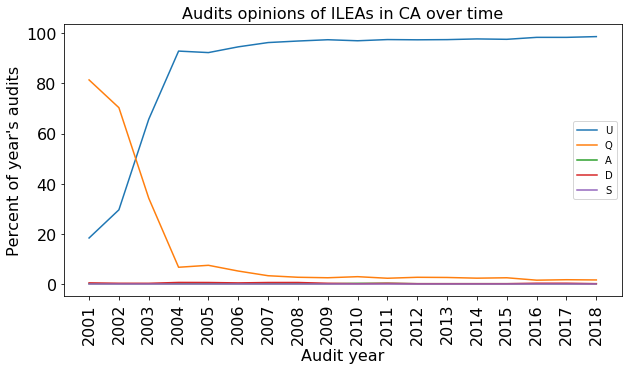

In [9]:
state = 'CA'
op_list = ['U', 'Q', 'A', 'D', 'S']
state_df = ilea_df[ilea_df['STATE'] == state]
state_df = state_df.groupby('AUDITYEAR')['TYPEREPORT_FS'].value_counts().unstack(level=1)
state_op_df = pd.DataFrame(index=state_df.index, columns=op_list)
for op in op_list:
    state_ops = [i for i in state_df.columns if op in i]
    state_op_df[op] = state_df.loc[:,state_ops].sum(axis=1)
state_op_df = state_op_df.div(state_df.sum(axis=1), axis=0) * 100  # normalize each year by state_df total


fig, axes = plt.subplots(figsize=(10, 5))
state_plot = state_op_df.plot(
    y=op_list, fontsize=16, ax=axes, xticks=state_op_df.index, rot=90
)
state_plot.set_xlabel('Audit year', fontsize=16)
state_plot.set_ylabel('Percent of year\'s audits', fontsize=16)
state_plot.set_title('Audits opinions of ILEAs in %s over time' %state, fontsize=16)
plt.show()
# state_df_sorted

## Find ILEAs with an absurd number of A/D audits

In [10]:
sorted(ilea_audit_dict.items(), reverse=True, key=lambda x:x[1])

[(366004125, 25),
 (376006325, 24),
 (366007311, 21),
 (376002416, 20),
 (366005761, 16),
 (376004011, 16),
 (366004649, 15),
 (366005086, 15),
 (376006303, 15),
 (730758320, 15),
 (731084608, 15),
 (731386138, 15),
 (731410240, 15),
 (736021048, 15),
 (736021227, 15),
 (362785263, 14),
 (362837518, 14),
 (366004320, 14),
 (370859478, 14),
 (376003710, 14),
 (376003711, 14),
 (376004024, 14),
 (376014065, 14),
 (480724503, 14),
 (710475989, 14),
 (730766864, 14),
 (731009127, 14),
 (736021191, 14),
 (362559265, 13),
 (362880190, 13),
 (362942532, 13),
 (362957481, 13),
 (363672038, 13),
 (366004648, 13),
 (366004759, 13),
 (366004784, 13),
 (366004845, 13),
 (366004952, 13),
 (366004960, 13),
 (366005471, 13),
 (366008136, 13),
 (370900329, 13),
 (371130499, 13),
 (371401053, 13),
 (376002534, 13),
 (376002586, 13),
 (376002687, 13),
 (376002704, 13),
 (376002917, 13),
 (376003273, 13),
 (562516393, 13),
 (731034095, 13),
 (736021094, 13),
 (20267686, 12),
 (346003334, 12),
 (363538593

In [11]:
ein = 366005086
ein_df = general_df[general_df['EIN'] == ein]['AUDITEENAME']
ein_df

117272                                        MCHENRY SD 15
117273                 MCHENRY COUNTY CONSERVATION DISTRICT
389385     MCHENRY COMMUNITY CONSOLIDATED SCHOOL DIST NO 15
389386     MCHENRY COMMUNITY CONSOLIDATED SCHOOL DIST NO 15
389387    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389388    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389389    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389390    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389391    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389392    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389393    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389394    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT 15
389395    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389396    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389397        MCHENRY COMMUNITY CONSOLIDATED SCHOOL DIST 15
389398    MCHENRY COMMUNITY CONSOLIDATED SCHOOL DISTRICT...
389399    MCHENRY COMMUNITY CONSOLIDATED